# Sales Insights Dashboard

## Python + Tableau

### Project Scope

Built a clean, reproducible pipeline that prepares sales data with useful aggregations (sales by product, monthly trend, sales by region, top customers, profit), export results for Tableau, and optionally produce diagnostic charts. 

__Data Source:__ 

Warehouse & Retail Sales : https://catalog.data.gov/dataset/warehouse-and-retail-sales

__Key Metrics:__

* Total Sales

* Sales by Product/Region

* Monthly/Quarterly Trends

* Top Customers

* Profit Margins

### Download/Collect Data

In [1]:
import pandas as pd

df=pd.read_csv('Warehouse_and_Retail_Sales.csv')
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00


__Observe Data__

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


__Dataset Overview__

>* Size: 307645 entries, 0 to 307644
>* Columns:  9 columns
>* Memory Usage : 21.1+ MB

| Column | Data Type | Missing Values | Notes |
|--------|-----------|----------------|-------|
| YEAR | int64 | None | All 307,645 entries present |
| MONTH | int64 | None | All entries present |
| SUPPLIER | object (text) | 167 missing | Only 307,478 non-nullI |
| TEM CODE | object (text) | None | All entries present |
| ITEM DESCRIPTION | object (text) | None | All entries present |
| ITEM TYPE | object (text) | 1 missing | 307,644 non-null |
| RETAIL SALES | float64 (decimal) | 3 missing | 307,642 non-null | 
| RETAIL TRANSFERS | float64 (decimal) | None | All entries present |
| WAREHOUSE SALES | float64 (decimal) | None | All entries present |

This dataset contains minimal missing data (only 171 total missing values across all columns).

In [3]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


| Statistic | Description |
|-----------|-------------|
| count | Number of non-null values in each column |
| mean | Average value |
| std | Standard deviation (spread of the data) |
| min | Minimum value |
| 25% | First quartile (25% of data is below this) |
| 50% | Median (middle value) |
| 75% | Third quartile (75% of data is below this) |
| max | Maximum value |



#### Key Insights

__YEAR:__

- Data spans 2017-2020 (4 years)
- Average year is ~2018.4, suggesting more data from earlier years

__MONTH__

- Covers all 12 months (1-12)
- Average month is ~6.4 (slightly skewed toward mid-year)

__RETAIL SALES__

- Highly skewed: median is 0.32, but max is 2,739
- Most transactions are small (75% are under 3.27)
- Has negative values (min: -6.49) indicating returns/adjustments
- 3 missing values

__RETAIL TRANSFERS__

- Similar pattern: median is 0, max is 1,990.83
- Also has negative values (min: -38.49)
- 75% of transfers are under 3

__WAREHOUSE SALES__

- Extreme outlier: max value is 18,317!
- Very wide spread (std: 249.92)
- Median is just 1, suggesting most warehouse sales are small
- Also has negative values (min: -7,800) - likely returns

### Clean Data

To clean the data and transform them in a comprehensive way: 

>* We convert date/time fields into proper datetime objects.
>* Handle all the 171 total missing values (drop or impute, depending on context).
>* Create derived fields useful for analysis (Year, Month, Quarter from the date, Sales / Movement ratio (if “movement” means quantity).
>* Filter or subset if needed (for example recent years, or particular departments).
>* Export a cleaned dataset version.

__Missing Values__

In [4]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [7]:
# drop missing values
# df= df.dropna(subset={'SUPPLIER','ITEM TYPE', 'RETAIL SALES'})

''' BUT I am going to fill this categories even if the amount of missing values is not that huge'''



# fill missing values
df['SUPPLIER']=df['SUPPLIER'].fillna('Unknown')

df['ITEM TYPE']=df['ITEM TYPE'].fillna('Unknown Type')

df['RETAIL SALES']=df['RETAIL SALES'].fillna(0)

df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00


In [8]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

WE NOW DONT HAVE MISSING VALUES

#### Create Date Column

In [12]:
df['DATE']=pd.to_datetime(df[['YEAR','MONTH']].assign(DAY=1))

df['QUARTER']=df['DATE'].dt.quarter

df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,QUARTER
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01,1
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01,1
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01,1
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01,1
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01,1


#### Clean Categorical Text Fields

By using this approach below, we make sure that values like " wine " and "Wine" are treated the same.

In [15]:
df['SUPPLIER']=df['SUPPLIER'].str.strip().str.title()
df['ITEM DESCRIPTION']=df['ITEM DESCRIPTION'].str.strip().str.title()
df['ITEM TYPE']=df['ITEM TYPE'].str.strip().str.title()

#### Create Total Sales

In [18]:
df['TOTAL SALES']=df['RETAIL SALES']+df['RETAIL TRANSFERS']+df['WAREHOUSE SALES']

#### Remove Duplicates

In [20]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [21]:
# drop duplicates
df=df.drop_duplicates()

#### Final Check and Save Dataset

In [23]:
df.to_csv('warehouse_retail_sales_clean.csv', index=False)
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,QUARTER,TOTAL SALES
0,2020,1,Republic National Distributing Co,100009,Bootleg Red - 750Ml,Wine,0.00,0.0,2.0,2020-01-01,1,2.00
1,2020,1,Pwswn Inc,100024,Moment De Plaisir - 750Ml,Wine,0.00,1.0,4.0,2020-01-01,1,5.00
2,2020,1,Reliable Churchill Lllp,1001,S Smith Organic Pear Cider - 18.7Oz,Beer,0.00,0.0,1.0,2020-01-01,1,1.00
3,2020,1,Lanterna Distributors Inc,100145,Schlink Haus Kabinett - 750Ml,Wine,0.00,0.0,1.0,2020-01-01,1,1.00
4,2020,1,Dionysos Imports Inc,100293,Santorini Gavala White - 750Ml,Wine,0.82,0.0,0.0,2020-01-01,1,0.82


### EDA - Exploratory Data Analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('warehouse_retail_sales_clean.csv', parse_dates=['DATE'])

In [27]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,QUARTER,TOTAL SALES
0,2020,1,Republic National Distributing Co,100009,Bootleg Red - 750Ml,Wine,0.00,0.0,2.0,2020-01-01,1,2.00
1,2020,1,Pwswn Inc,100024,Moment De Plaisir - 750Ml,Wine,0.00,1.0,4.0,2020-01-01,1,5.00
2,2020,1,Reliable Churchill Lllp,1001,S Smith Organic Pear Cider - 18.7Oz,Beer,0.00,0.0,1.0,2020-01-01,1,1.00
3,2020,1,Lanterna Distributors Inc,100145,Schlink Haus Kabinett - 750Ml,Wine,0.00,0.0,1.0,2020-01-01,1,1.00
4,2020,1,Dionysos Imports Inc,100293,Santorini Gavala White - 750Ml,Wine,0.82,0.0,0.0,2020-01-01,1,0.82


#### Total Sales 

Overall

In [31]:
total_sales= df['TOTAL SALES'].sum()
print(f"Total Sales: {total_sales:,.2f}")

Total Sales: 12,076,624.28


By Chanel

In [35]:
channel_sales = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum()
print(channel_sales)

RETAIL SALES        2160899.37
RETAIL TRANSFERS    2133968.63
WAREHOUSE SALES     7781756.28
dtype: float64


We observe that the WAREHOUS SALES contribute the most to revenue.

#### Monthly Sales Trends

Monthly and Seasonal Trends

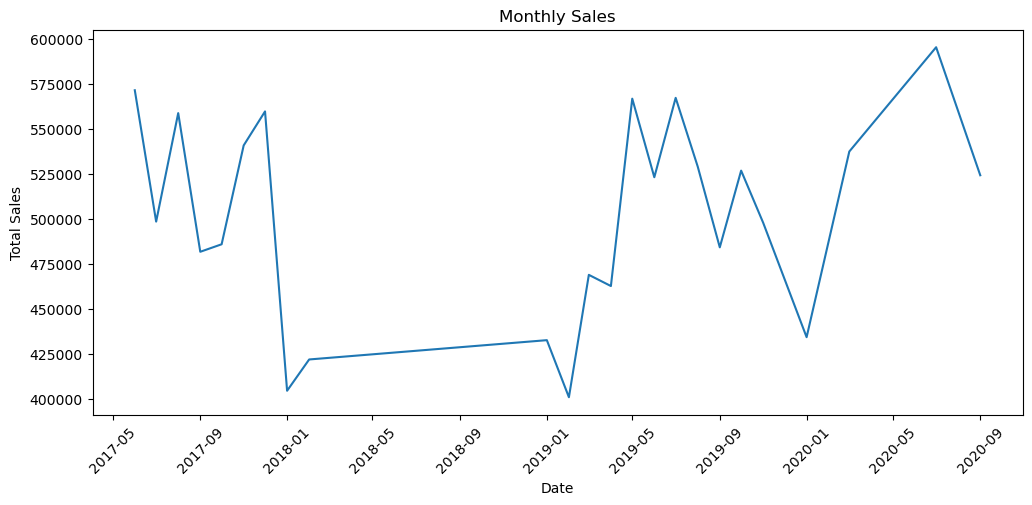

In [37]:
monthly_sales= df.groupby(['DATE'])['TOTAL SALES'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='DATE', y='TOTAL SALES')
plt.title('Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

#### Top 10 Items by Total Sales

Highlighting best-selling products.

In [39]:
top_items=df.groupby(['ITEM DESCRIPTION'])['TOTAL SALES'].sum().sort_values(ascending=False).head(10)
top_items

ITEM DESCRIPTION
Corona Extra Loose Nr - 12Oz          352574.83
Corona Extra 2/12 Nr - 12Oz           266992.08
Heineken Loose Nr - 12Oz              206675.17
Heineken 2/12 Nr - 12Oz               169564.90
Miller Lite 30Pk Can - 12Oz           162971.40
Corona Extra 4/6 Nr - 12Oz            140151.32
Modelo Especial 24 Loose Nr - 12Oz    126634.80
Bud Light 30Pk Can                    120735.97
Heineken 4/6 Nr - 12Oz                110962.92
Corona Extra 18Pk Nr - 12Oz           100913.44
Name: TOTAL SALES, dtype: float64

C:\Users\kwnst\AppData\Local\Temp\ipykernel_3656\1778100403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


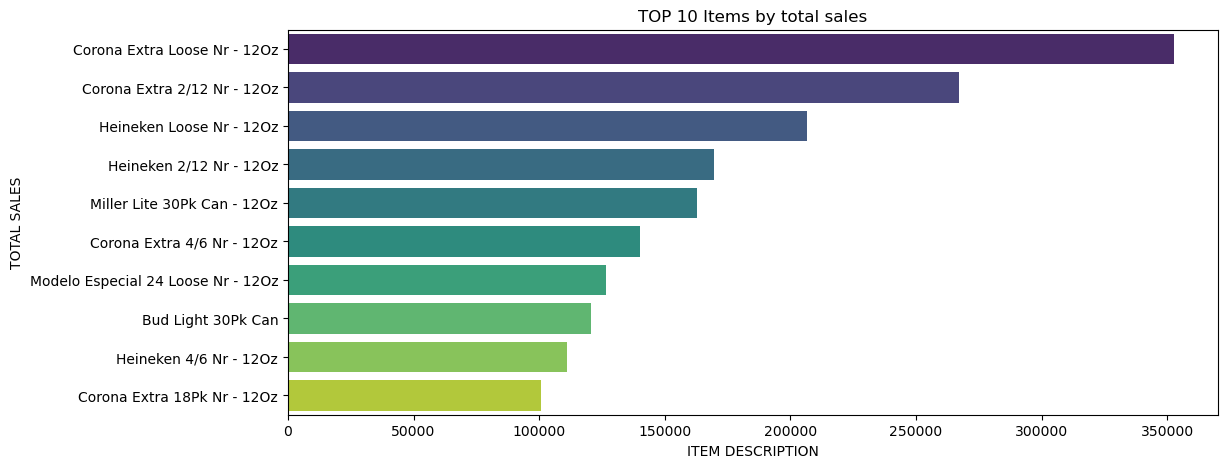

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('TOP 10 Items by total sales')
plt.ylabel('TOTAL SALES')
plt.xlabel('ITEM DESCRIPTION')
plt.show()

#### Top Suppliers

Suppliers contributing most to revenue.

In [43]:
top_suppliers=df.groupby(['SUPPLIER'])['TOTAL SALES'].sum().sort_values(ascending=False).head(10)
top_suppliers

SUPPLIER
Crown Imports               1819141.93
Miller Brewing Company      1597808.94
Anheuser Busch Inc          1549362.68
Heineken Usa                 940796.79
E & J Gallo Winery           528656.13
Diageo North America Inc     459921.54
Constellation Brands         380826.10
Boston Beer Corporation      271825.23
The Wine Group               200316.64
Jim Beam Brands Co           199336.22
Name: TOTAL SALES, dtype: float64

C:\Users\kwnst\AppData\Local\Temp\ipykernel_3656\4156866888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='magma')


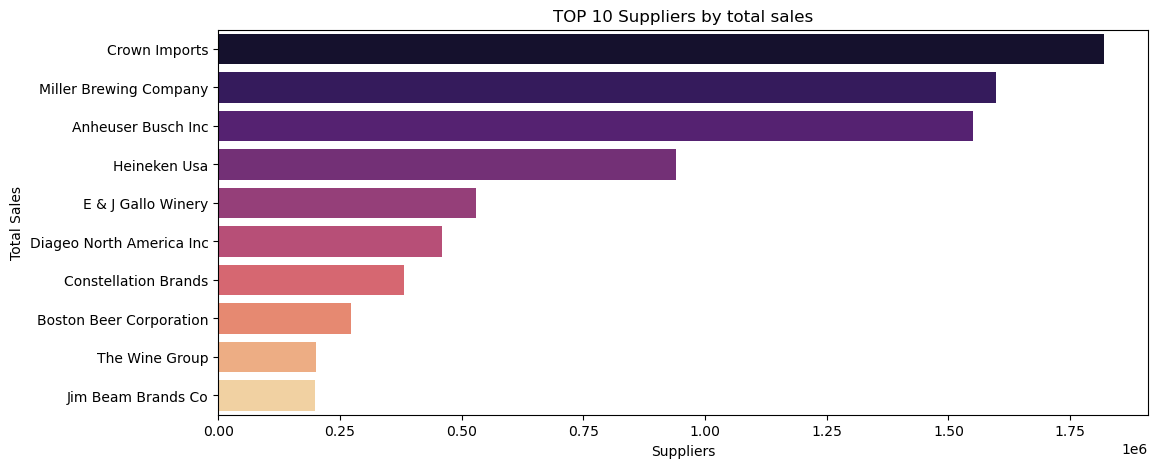

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='magma')
plt.title('TOP 10 Suppliers by total sales')
plt.ylabel('Total Sales')
plt.xlabel('Suppliers')
plt.show()

#### Sales by Item Type

In [59]:
type_sales=df[df['TOTAL SALES'] > 0].groupby('ITEM TYPE')['TOTAL SALES'].sum()
type_sales

ITEM TYPE
Beer            7668903.30
Kegs             118622.00
Liquor          1692597.13
Non-Alcohol       86901.49
Ref                1350.63
Str_Supplies      13587.46
Unknown Type          1.00
Wine            2638596.04
Name: TOTAL SALES, dtype: float64

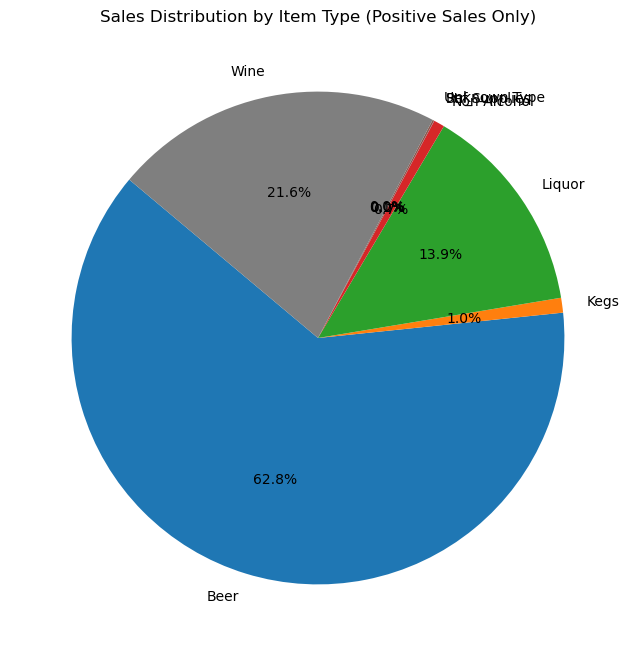

In [60]:
plt.figure(figsize=(8,8))
plt.pie(type_sales, labels=type_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Item Type (Positive Sales Only)")
plt.show()

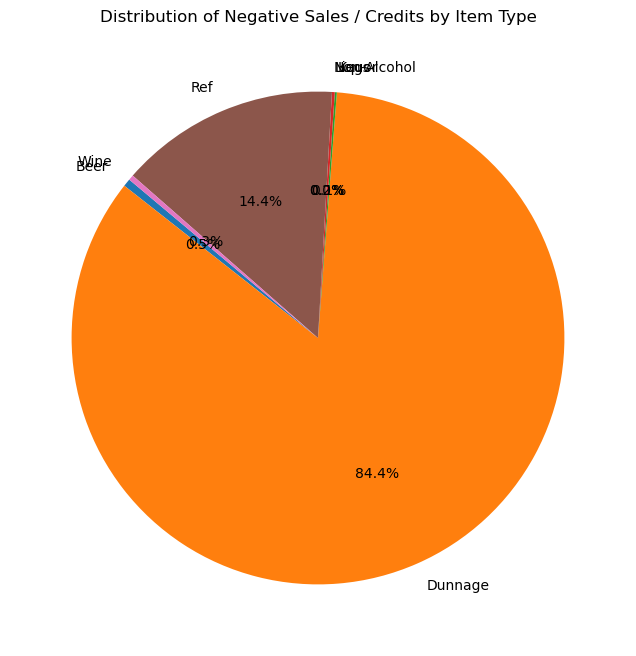

In [69]:
negatives = df[df['TOTAL SALES'] < 0].groupby('ITEM TYPE')['TOTAL SALES'].sum()

plt.figure(figsize=(8,8))
plt.pie(negatives.abs(), labels=negatives.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Negative Sales / Credits by Item Type")
plt.show()

#### Season Analysis

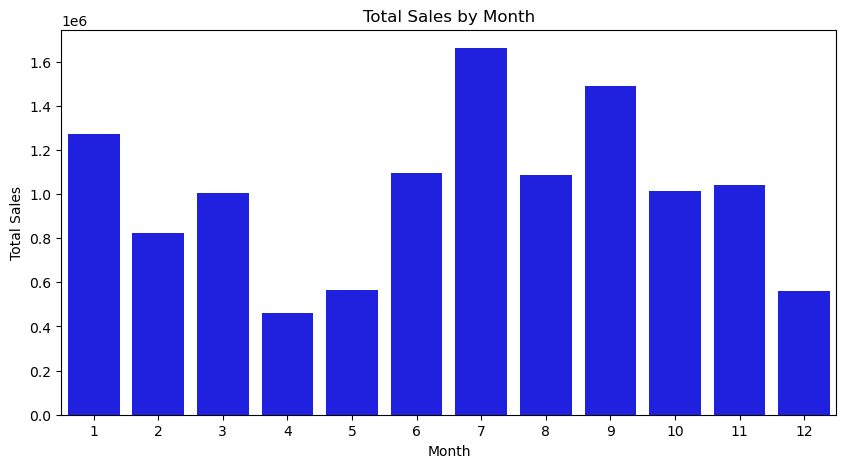

In [53]:
# Sales by month
month_sales = df.groupby('MONTH')['TOTAL SALES'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=month_sales.index, y=month_sales.values, color="blue")
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()